In [ ]:
import pandas as pd
import pandas as pdo
import plotly.express as px
from sklearn.manifold import TSNE 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import pickle

import scipy
from tabulate import tabulate
import PIL 
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
import scipy.io as sio



In [ ]:
def get_minibatch(X, y, minibatch_size = 64):
    minibatches = []

 # for the second question pass minibatch 64
    for i in range(0, X.shape[0], minibatch_size):
        X_mini = X[i:i + minibatch_size]
        y_mini = y[i:i + minibatch_size]

        minibatches.append((X_mini, y_mini))

    return minibatches


def momentum(model, X_train, y_train, minibatch_size = 64):
    velocity = {k: np.zeros_like(v) for k, v in model.items()}
    ### Setting the gamma value
    gamma = .9
    alpha = 1e-2

    minibatches = get_minibatch(X_train, y_train, minibatch_size)

    ############### No of n_iter =100 
    # n_iter is hyperpaprameter
    for iter in range(1, 151):
        idx = np.random.randint(0, len(minibatches))
        X_mini, y_mini = minibatches[idx]

        grad = get_minibatch_grad(model, X_mini, y_mini)

        for layer in grad:
            # adding the velcotiy to add momentum REST are same with SGD
            velocity[layer] = gamma * velocity[layer] + alpha * grad[layer]
            model[layer] += velocity[layer]

    return model


################################################  NESTROV #############################################################
def nesterov(model, X_train, y_train, minibatch_size = 64):
    velocity = {k: np.zeros_like(v) for k, v in model.items()}
    gamma = .9
    alpha = 1e-2

    minibatches = get_minibatch(X_train, y_train, minibatch_size)

    for iter in range(1, 151):
        idx = np.random.randint(0, len(minibatches))
        X_mini, y_mini = minibatches[idx]
        ############################# IT calculated the gradient at the approximated new position.
        model_ahead = {k: v + gamma * velocity[k] for k, v in model.items()}
        grad = get_minibatch_grad(model_ahead, X_mini, y_mini)

        for layer in grad:
            velocity[layer] = gamma * velocity[layer] + alpha * grad[layer]
            model[layer] += velocity[layer]

    return model



##################################################   ADAGRAD #####################################
def adagrad(model, X_train, y_train, minibatch_size = 64):
    cache = {k: np.zeros_like(v) for k, v in model.items()}
    alpha = 1e-2
    eps = 1e-8


    minibatches = get_minibatch(X_train, y_train, minibatch_size)

    for iter in range(1, 151):
        idx = np.random.randint(0, len(minibatches))
        X_mini, y_mini = minibatches[idx]

        grad = get_minibatch_grad(model, X_mini, y_mini)

        for k in grad:
            cache[k] += grad[k]**2
            model[k] += alpha * grad[k] / (np.sqrt(cache[k]) + eps)

    return model

####################################   RMSPOP OPTIMIZER ####################################
def rmsprop(model, X_train, y_train, minibatch_size=64):
    cache = {k: np.zeros_like(v) for k, v in model.items()}
    gamma = .9
    alpha = 1e-2
    eps = 1e-8

    minibatches = get_minibatch(X_train, y_train, minibatch_size)

    for iter in range(1, 151):
        idx = np.random.randint(0, len(minibatches))
        X_mini, y_mini = minibatches[idx]

        grad = get_minibatch_grad(model, X_mini, y_mini)

        for k in grad:
            cache[k] = gamma * cache[k] + (1 - gamma) * (grad[k]**2)
            model[k] += alpha * grad[k] / (np.sqrt(cache[k]) + eps)

    return model



def adam(model, X_train, y_train, minibatch_size = 64):
    M = {k: np.zeros_like(v) for k, v in model.items()}
    R = {k: np.zeros_like(v) for k, v in model.items()}
    beta1 = .9
    beta2 = .999
    eps = 1e-8
    alpha = 1e-2

    minibatches = get_minibatch(X_train, y_train, minibatch_size)

    for iter in range(1, 151):
        t = iter
        idx = np.random.randint(0, len(minibatches))
        X_mini, y_mini = minibatches[idx]

        grad = get_minibatch_grad(model, X_mini, y_mini)

        for k in grad:
            M[k] = beta1 * M[k] + (1. - beta1) * grad[k]
            R[k] = beta2 * R[k] + (1. - beta2) * grad[k]**2

            m_k_hat = M[k] / (1. - beta1**(t))
            r_k_hat = R[k] / (1. - beta2**(t))

            model[k] += alpha * m_k_hat / (np.sqrt(r_k_hat) + eps)

    return model


def make_network(n_hidden=150):
    model = dict(
        W1=np.random.randn(784, n_hidden),
        W2=np.random.randn(n_hidden, 10)
    )

    return model


def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()


def forward(x, model):
    # Input to hidden
    h = x @ model['W1']
    h[h < 0] = 0

    # Hidden to output
    prob = softmax(h @ model['W2'])

    return h, prob


def backward(model, xs, hs, errs):
    dW2 = hs.T @ errs

    dh = errs @ model['W2'].T
    dh[hs < 0] = 0
    dW1 = xs.T @ dh

    return dict(W1=dW1, W2=dW2)


def get_minibatch_grad(model, X_train, y_train):
    xs, hs, errs = [], [], []

    for x, cls_idx in zip(X_train, y_train):
        h, y_pred = forward(x, model)

        y_true = np.zeros(10)
        y_true[int(cls_idx)] = 1.
        err = y_true - y_pred

        xs.append(x)
        hs.append(h)
        errs.append(err)

    return backward(model, np.array(xs), np.array(hs), np.array(errs))

(2000,)


(2000, 784)

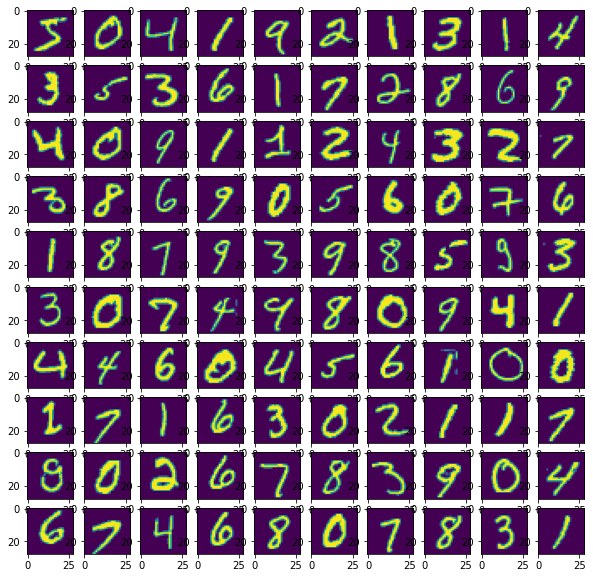

In [ ]:


f = open('/content/drive/MyDrive/Colab Notebooks/DL/A2_1/train_set.pkl', 'rb')   # 'r' for reading; can be omitted
mat = pickle.load(f)         # load file content as mydict
f.close()

f1 = open('/content/drive/MyDrive/Colab Notebooks/DL/A2_1/val_set.pkl', 'rb')   # 'r' for reading; can be omitted
mat1 = pickle.load(f1)         # load file content as mydict
f1.close()

X = mat['Image']
X1=np.empty(shape=(10000,28,28),dtype='float')
Y = mat['Labels']
for x in range(len(X)):
  X1[x] = np.asarray(X[x])


X11 = mat1['Image']
print(X11.shape)
X111=np.empty(shape=(2000,28,28),dtype='float')
Y11 = mat1['Labels']
for x in range(len(X11)):
  X111[x] = np.asarray(X11[x])


##############################   DATA VISULIZATION ###########################
fig, axes = plt.subplots(10,10, figsize=(10,10))
for i,ax in enumerate(axes.flat):
    ax.imshow(np.squeeze(X1[i]))
##############################################################################
X1 = X1.reshape(10000,784)
X111 = X111.reshape(2000,784)
X1.shape
X111.shape

In [ ]:
X_train = X1
y_train = Y
y_test = Y11
X_test = X111
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10000, 784)
(2000, 784)
(10000,)
(2000,)


**Refrence and Start Running from below cell **

REFRENCE : 
https://github.com/fanghao6666/neural-networks-and-deep-learning/blob/master/py/Optimization%20methods.py

https://github.com/oreilly-japan/deep-learning-from-scratch/blob/master/common/optimizer.py

https://towardsdatascience.com/how-to-implement-an-adam-optimizer-from-scratch-76e7b217f1cc

https://towardsdatascience.com/coding-neural-network-forward-propagation-and-backpropagtion-ccf8cf369f76


https://github.com/addyg/Neural-Network-from-Scratch/blob/master/02%20SRC/NeuralNetwork.py

https://arxiv.org/pdf/1412.6980


    eps = 1e-8  # deal with zero in denominator
    alpha = 1e-2
    ieration = 100
    mini_batches_size = 64
    beta1 = .9
    beta2 = .999
    gamma = 0.9

In [ ]:
######################################3    RUN FROM THIS ###########################################
######################################3    RUN FROM THIS ###########################################
######################################3    RUN FROM THIS ###########################################

##################################################################
######################   MOMENTUM OPTIMIZER  #####################
##################################################################


model = make_network()
model = momentum(model, X_train, y_train, 64)

y_pred = np.zeros_like(y_test)
filename1 = 'momentum.sav'
pickle.dump(model, open(filename1, 'wb'))

for i, x in enumerate(X_test):
  _, prob = forward(x, model)
  # print(prob)
  y = np.argmax(prob)
  # print(" -- ",y)
  y_pred[i] = y

print("Accuracy",np.mean(y_pred == y_test)*100)

print("Confusion Matrix = \n",confusion_matrix(y_test, y_pred))

Accuracy 17.2
Confusion Matrix = 
 [[  1   4   0   0   8   0   0   0 187   0]
 [  0 196   0   0   0   0   0   0   4   0]
 [  0  34   0   0  10   0   0   0 156   0]
 [  0  11   0   0  46   0   0   0 143   0]
 [  0  37   0   0  20   0   0   0 143   0]
 [  0  35   0   0  49   0   0   0 116   0]
 [  0  60   0   0  54   0   0   0  86   0]
 [  0  99   0   0   0   0   0   0 101   0]
 [  0  57   0   0  16   0   0   0 127   0]
 [  0  44   0   0   4   0   0   0 152   0]]


In [ ]:
##################################################################
######################   NESROV   OPTIMIZER  #####################
##################################################################

model = make_network()
model = nesterov(model, X_train, y_train, 64)

y_pred = np.zeros_like(y_test)

filename2 = 'nestrov.sav'
pickle.dump(model, open(filename2, 'wb'))

for i, x in enumerate(X_test):
  _, prob = forward(x, model)
  y = np.argmax(prob)
  y_pred[i] = y

# print(np.mean(y_pred == y_test))

print("Accuracy",np.mean(y_pred == y_test)*100)

print("Confusion Matrix = \n",confusion_matrix(y_test, y_pred))

Accuracy 13.3
Confusion Matrix = 
 [[194   0   2   0   0   1   3   0   0   0]
 [200   0   0   0   0   0   0   0   0   0]
 [200   0   0   0   0   0   0   0   0   0]
 [186   0   0   0   0  14   0   0   0   0]
 [182   0   5   0  10   2   1   0   0   0]
 [144   0   0   0   0  56   0   0   0   0]
 [192   0   1   0   1   0   6   0   0   0]
 [196   0   0   0   0   3   1   0   0   0]
 [200   0   0   0   0   0   0   0   0   0]
 [193   0   0   0   0   7   0   0   0   0]]


In [ ]:
##################################################################
######################   ADAGRAD  OPTIMIZER  #####################
##################################################################

model = make_network()
model = adagrad(model, X_train, y_train, 64)

y_pred = np.zeros_like(y_test)

filename3 = 'adagrad.sav'
pickle.dump(model, open(filename3, 'wb'))


for i, x in enumerate(X_test):
  _, prob = forward(x, model)
  y = np.argmax(prob)
  y_pred[i] = y

# print(np.mean(y_pred == y_test))

print("Accuracy",np.mean(y_pred == y_test)*100)

print("Confusion Matrix = \n",confusion_matrix(y_test, y_pred))

Accuracy 54.65
Confusion Matrix = 
 [[133   0   8  10   0  21  17   2   7   2]
 [  0 158   4  19   3   1   1   5   6   3]
 [  2  13 105  35   5   2  10  10  16   2]
 [  3   8  13 107   1  35   8  10   6   9]
 [  0   2   4   8 106  16   5   9   9  41]
 [ 14   1   3  40   4  71  11  13  22  21]
 [ 10   2  17   5  21   8 113   1  17   6]
 [  3  10   9   9  11   8   1 114  10  25]
 [ 13   9  24  25   4  17   8   6  92   2]
 [  4   1   4   4  43   9   3  24  14  94]]


In [ ]:
##################################################################
######################   RMSPROP  OPTIMIZER  #####################
##################################################################

model = make_network()
model = rmsprop(model, X_train, y_train, 64)
filename4 = 'rmsprop.sav'
pickle.dump(model, open(filename4, 'wb'))

y_pred = np.zeros_like(y_test)

for i, x in enumerate(X_test):
  _, prob = forward(x, model)
  y = np.argmax(prob)
  y_pred[i] = y

# print(np.mean(y_pred == y_test))
print("Accuracy",np.mean(y_pred == y_test)*100)

print("Confusion Matrix = \n",confusion_matrix(y_test, y_pred))

Accuracy 77.7
Confusion Matrix = 
 [[167   0   1   2   0   8  12   3   5   2]
 [  0 186   1   1   0   6   3   1   2   0]
 [  0   1 158   4   0   1  13   8  12   3]
 [  2   0  11 131   0  27   6  10  10   3]
 [  0   0   1   0 131   0  14   2   3  49]
 [  8   0   6   7   7 143   3   2  21   3]
 [  4   3   7   0   6   5 169   1   5   0]
 [  0   7   8   1   1   1   1 166   2  13]
 [  4   4   9   4   6  12   3   9 137  12]
 [  1   1   0   3   5   2   3  13   6 166]]


In [ ]:
##################################################################
##########################   ADAM OPTIMIZER  #####################
##################################################################

model = make_network()
model = adam(model, X_train, y_train, 64)

filename5 = 'adam.sav'
pickle.dump(model, open(filename5, 'wb'))

y_pred = np.zeros_like(y_test)

for i, x in enumerate(X_test):
  _, prob = forward(x, model)
  y = np.argmax(prob)
  y_pred[i] = y

# print(np.mean(y_pred == y_test))

print("Accuracy",np.mean(y_pred == y_test)*100)

print("Confusion Matrix = \n",confusion_matrix(y_test, y_pred))

Accuracy 79.4
Confusion Matrix = 
 [[183   0   2   1   1   8   3   1   1   0]
 [  0 183   3   4   1   2   0   0   6   1]
 [  3   1 163   9   1   2   3   8   7   3]
 [  8   1  13 137   1  21   0  10   5   4]
 [  1   2   2   1 177   1   5   3   1   7]
 [  6   0   0   6   2 171   1   6   6   2]
 [ 12   2   7   1   7   9 152   5   5   0]
 [  0   4   5   4  10   0   1 159   3  14]
 [  5   0   7   8  11  24   4   3 125  13]
 [  1   1   1   2  30  13   1  11   2 138]]
